# Import Library & Dataset

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
warnings.filterwarnings("ignore")

In [25]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [26]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset
!unzip "/content/diabetes-prediction-dataset.zip" -d "/content/diabetes-prediction-dataset"

df = pd.read_csv('/content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df.head()

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
diabetes-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/diabetes-prediction-dataset.zip
replace /content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv  


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [27]:
def build_svc(X_train, y_train):
    model = SVC()
    return model

def build_logistic_regression(X_train, y_train):
    model = LogisticRegression()
    return model

def build_neural_network(X_train, y_train):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)
    return model

def build_random_forest(X_train, y_train):
    model = RandomForestClassifier()
    return model

def evaluation(model, X_test, y_test):
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_pred_prob > 0.5).astype(int)
    else:
        y_pred = (model.predict(X_test) > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Drop atribut Unnamed:0 karena merupakan sebuah user id yang bersifat unique dan tidak menjadi parameter yang digunakan untuk prediksi

In [28]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Missing data

In [29]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Preprocessing

In [31]:
df = df.drop_duplicates()

In [32]:
df.groupby('diabetes').count()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,87664,87664,87664,87664,87664,87664,87664,87664
1,8482,8482,8482,8482,8482,8482,8482,8482


In [33]:
df.groupby('gender').count()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,,
Female,56161,56161,56161,56161,56161,56161,56161,56161
Male,39967,39967,39967,39967,39967,39967,39967,39967
Other,18,18,18,18,18,18,18,18


In [34]:
df.groupby('smoking_history').count()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
smoking_history,,,,,,,,
No Info,32887,32887,32887,32887,32887,32887,32887,32887
current,9197,9197,9197,9197,9197,9197,9197,9197
ever,3998,3998,3998,3998,3998,3998,3998,3998
former,9299,9299,9299,9299,9299,9299,9299,9299
never,34398,34398,34398,34398,34398,34398,34398,34398
not current,6367,6367,6367,6367,6367,6367,6367,6367


In [35]:
df.gender.replace({'Female': 1, 'Male': 0, 'Other':2}, inplace=True)
df.smoking_history.replace({'never': 0, 'ever': 1, 'former':1, 'not current':1, 'current':2, 'No Info':2}, inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,1,54.0,0,0,2,27.32,6.6,80,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,2,23.45,5.0,155,0
4,0,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,1,36.0,0,0,2,24.60,4.8,145,0
99996,1,2.0,0,0,2,17.37,6.5,100,0
99997,0,66.0,0,0,1,27.83,5.7,155,0
99998,1,24.0,0,0,0,35.42,4.0,100,0


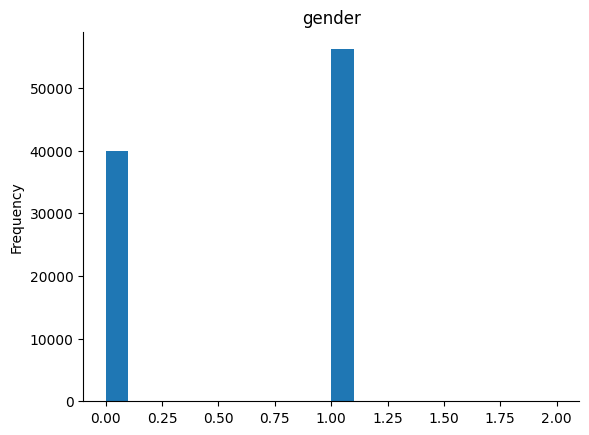

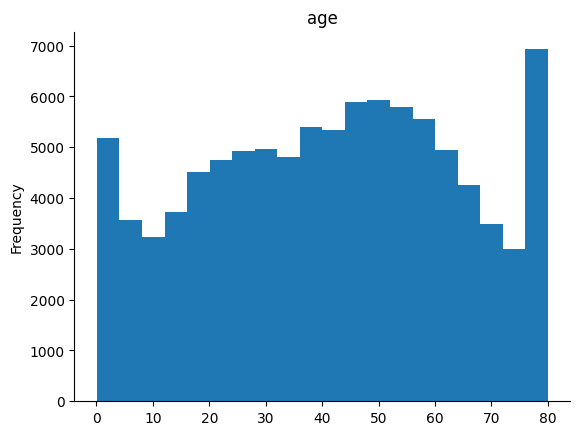

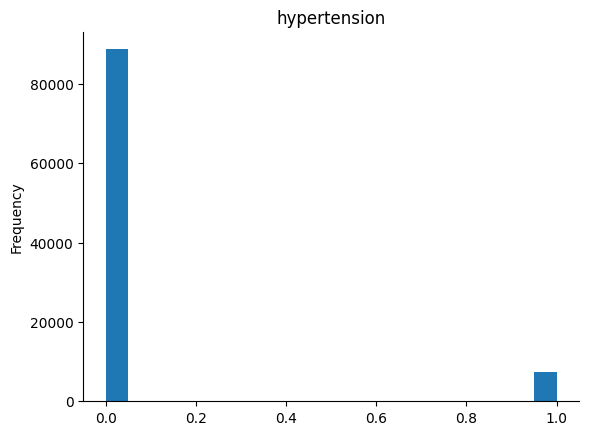

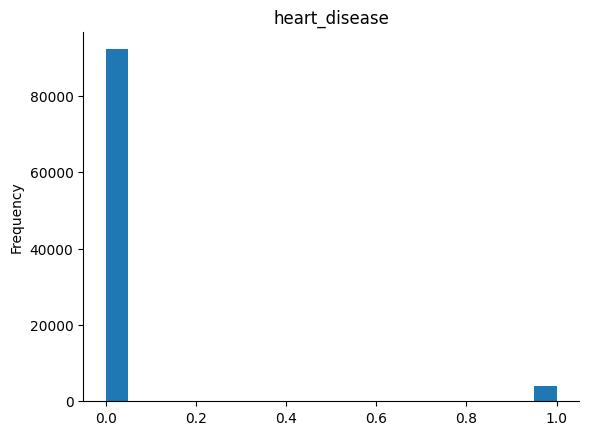

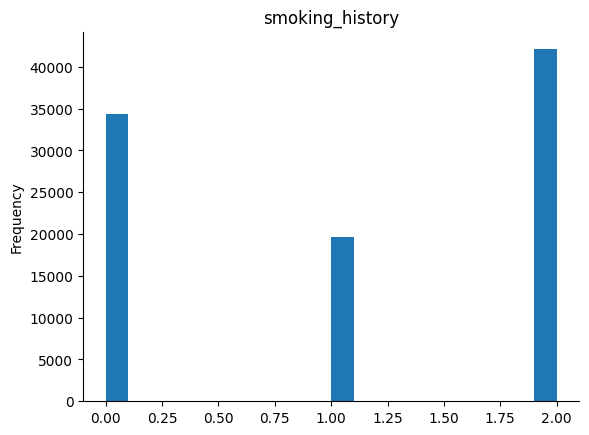

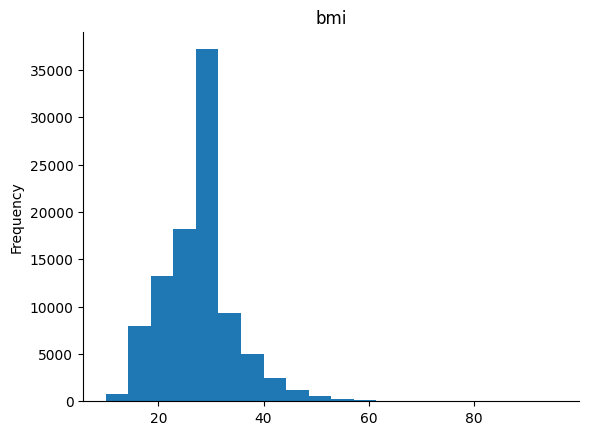

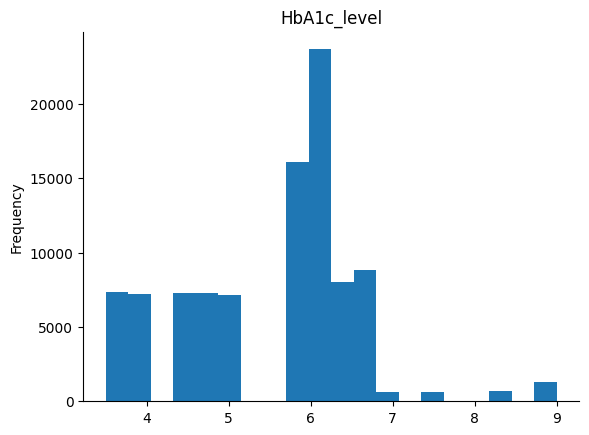

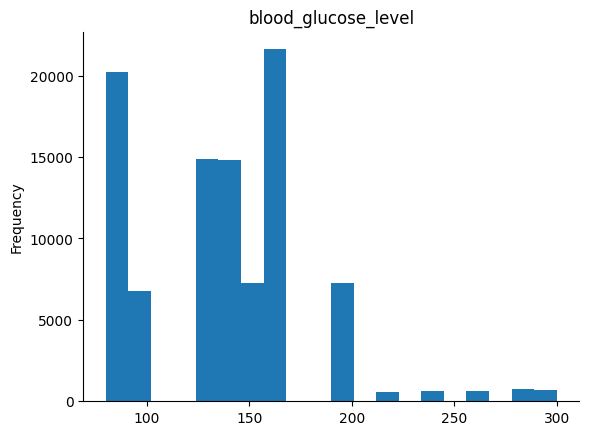

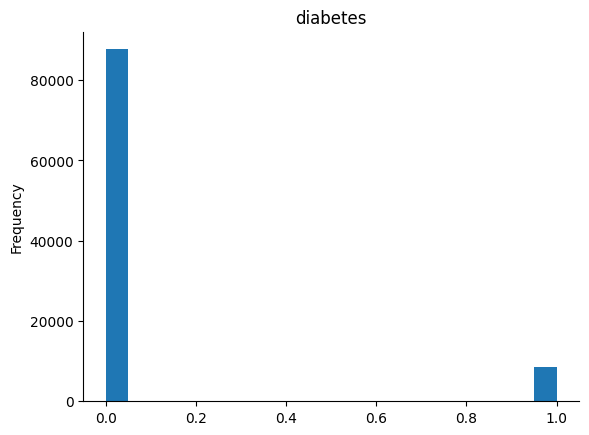

In [36]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure()
        df[column].plot(kind='hist', bins=20, title=column)
        plt.gca().spines[['top', 'right']].set_visible(False)
        plt.show()
    else:
        print(f"Skipping column {column} because it contains non-numeric data.")


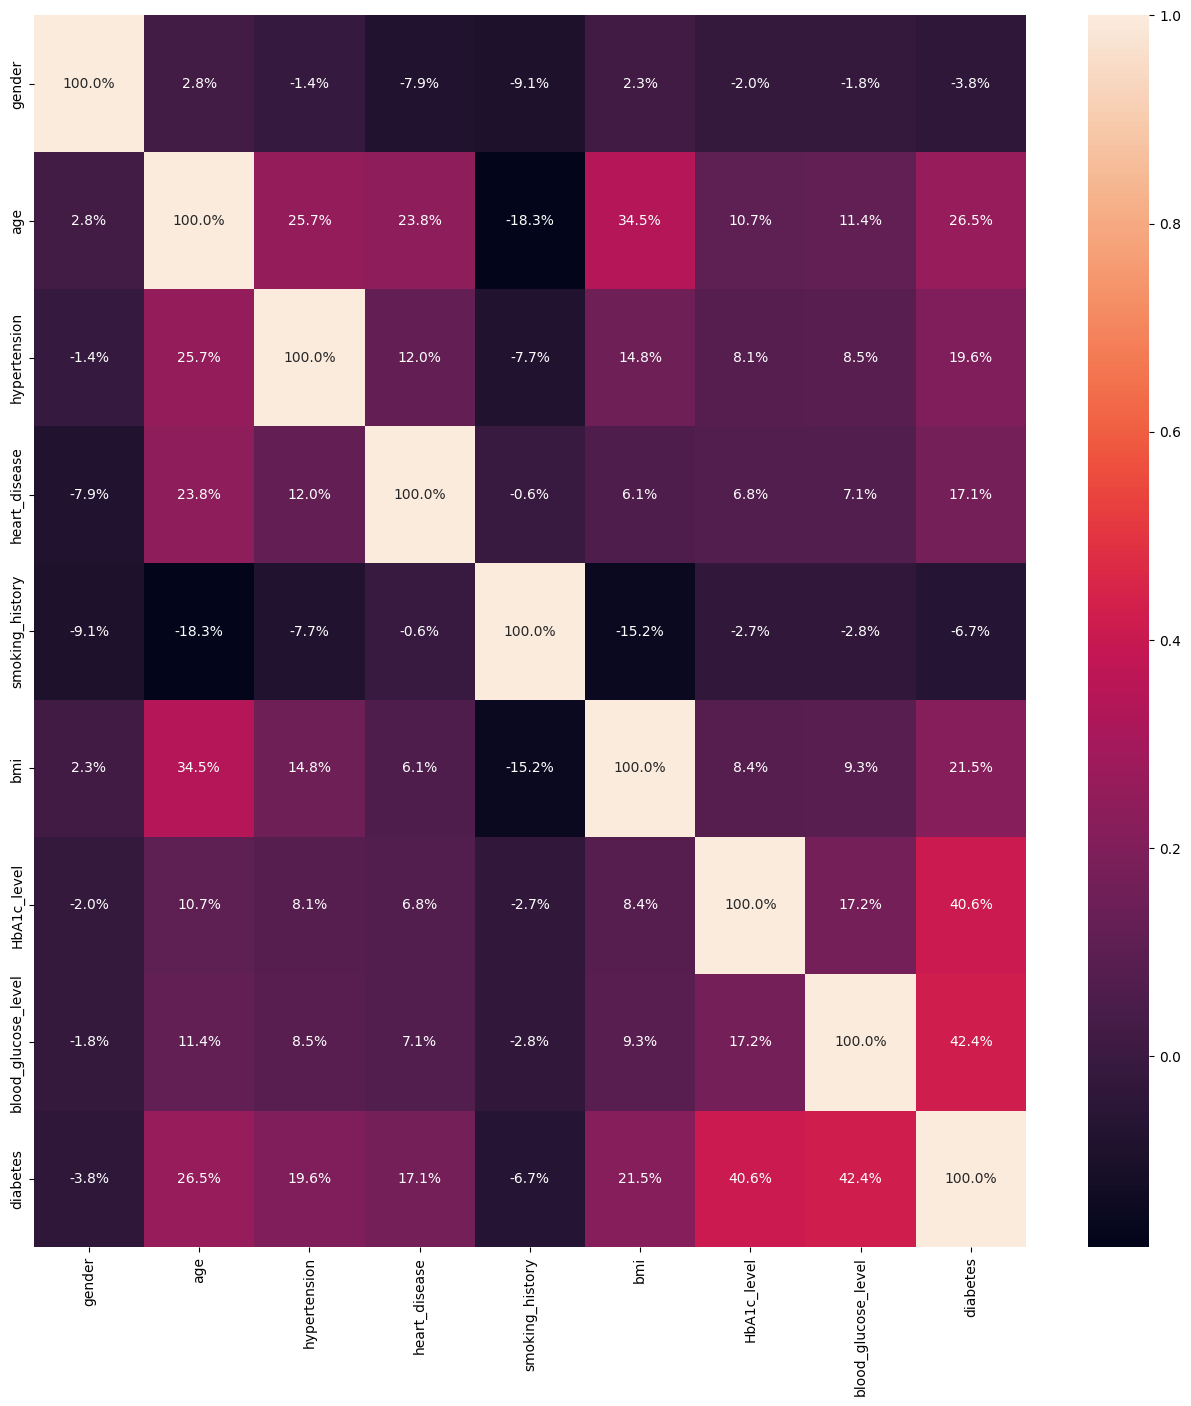

In [37]:
corr = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, fmt=".1%")

plt.show()

In [38]:
new_df = df.copy()
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,1,54.0,0,0,2,27.32,6.6,80,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,2,23.45,5.0,155,0
4,0,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,1,36.0,0,0,2,24.60,4.8,145,0
99996,1,2.0,0,0,2,17.37,6.5,100,0
99997,0,66.0,0,0,1,27.83,5.7,155,0
99998,1,24.0,0,0,0,35.42,4.0,100,0


# Standarisasi

In [39]:
scaler = StandardScaler()
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_scaled = scaler.fit_transform(X)

# Split data to data test and train

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Build Model Neural Network and Evaluation

Epoch 1/50
6154/6154 [==============================] - 15s 2ms/step - loss: 0.2597 - accuracy: 0.9170 - val_loss: 0.2454 - val_accuracy: 0.9204
Epoch 2/50
6154/6154 [==============================] - 17s 3ms/step - loss: 0.1970 - accuracy: 0.9312 - val_loss: 0.1606 - val_accuracy: 0.9429
Epoch 3/50
6154/6154 [==============================] - 15s 2ms/step - loss: 0.1675 - accuracy: 0.9404 - val_loss: 0.1461 - val_accuracy: 0.9455
Epoch 4/50
6154/6154 [==============================] - 13s 2ms/step - loss: 0.1514 - accuracy: 0.9460 - val_loss: 0.1515 - val_accuracy: 0.9461
Epoch 5/50
6154/6154 [==============================] - 13s 2ms/step - loss: 0.1430 - accuracy: 0.9482 - val_loss: 0.1227 - val_accuracy: 0.9589
Epoch 6/50
6154/6154 [==============================] - 17s 3ms/step - loss: 0.1366 - accuracy: 0.9521 - val_loss: 0.1267 - val_accuracy: 0.9563
Epoch 7/50
6154/6154 [==============================] - 13s 2ms/step - loss: 0.1343 - accuracy: 0.9532 - val_loss: 0.1330 - val_ac

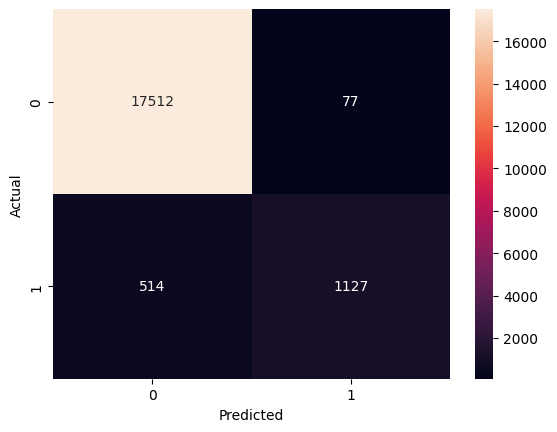

In [41]:
# svc_model = build_svc(X_train, y_train)
# logistic_model = build_logistic_regression(X_train, y_train)
nn_model = build_neural_network(X_train, y_train)
# rf_model = build_random_forest(X_train, y_train)
# evaluation(svc_model, X_test, y_test)
# evaluation(logistic_model, X_test, y_test)
evaluation(nn_model, X_test, y_test)
# evaluation(rf_model, X_test, y_test)
